## **SKYBUG INTERNSHIP**

## **AI INTERN**

## **TASK - 5**

## **Done By : A S V Dhanush**

### Develop an Al application that can detect and recognize faces in images or videos. Use pre-trained face detection models like Haar cascades or deep learning-based face detectors, and optionally add face recognition capabilities using techniques like Siamese networks or ArcFace.

### Using DL To Categorize Faces as **Angry**,**Disgust**,**Fear**,**Happy**,**Neutral**,**Sad**,**Surprise**


*Ensure The dataset in G-Drive is downloaded properly*

In [1]:
#Importing necessary libraries
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from IPython.display import HTML
import matplotlib.animation as animation
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten
from keras.optimizers import Adam
from keras.utils import np_utils
import keras
import os
import random

In [3]:
train_path = "./dataset/train"
test_path = "./dataset/test"

In [4]:
name_list = ["ANGRY","DISGUST","FEAR","HAPPY","NEUTRAL","SAD","SURPRISE"]

In [5]:
angry = []
disgust = []
fear = []
happy = []
neutral = []
sad = []
surprise = []

In [6]:
data_list = []

In [7]:

# Define the emotions and corresponding labels
emotions = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

# Initialize the lists
data_lists = {emotion: [] for emotion in emotions}
data_list = []

# Walk through the directory structure
for r, d, f in os.walk(train_path, topdown=False):
    for emotion, label in emotions.items():
        if emotion in r:
            for x_name in f:
                file_path = os.path.join(r, x_name)
                data_lists[emotion].append(file_path)
                data_list.append((file_path, label))

In [8]:
len(data_list)

28709

In [9]:
sentiments = [angry,disgust,fear,happy,neutral,sad,surprise]

#### Shuffling this data randomly 

In [10]:
random.shuffle(data_list)

In [11]:
#Appending to the class numbers
path_all = []
class_all = []
for x_cnt in range(len(data_list)):
    path_all.append(data_list[x_cnt][0])
    class_all.append(data_list[x_cnt][1])

In [55]:
pt_series = pd.Series(path_all,name="PATH")
cl_series = pd.Series(class_all,name="CLASS")

In [13]:
df = pd.concat([pt_series,cl_series],axis=1)

In [56]:
print(f"Target Class Labels: {np.unique(df.CLASS.values)}")

Target Class Labels: [0 1 2 3 4 5 6]


In [15]:
class_names = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad", 6: "surprise"}

#### Showing These Images

In [58]:
def plot_image(image,class_no):
    img = cv.cvtColor(cv.imread(image),cv.COLOR_BGR2RGB)
    plt.xlabel(f"Shape: {img.shape}")
    plt.ylabel(f"Size: {img.size}")
    plt.title(f"Mood: {class_names[class_no]}")
    plt.imshow(img)
    plt.tight_layout()
    plt.show()

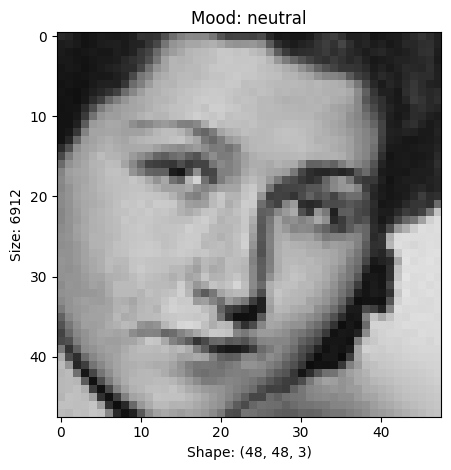

In [59]:
plot_image(df.PATH[20],df.CLASS[20])

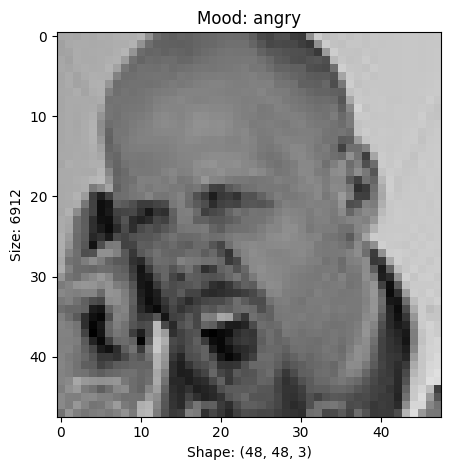

In [18]:
plot_image(df.PATH[500],df.CLASS[500])

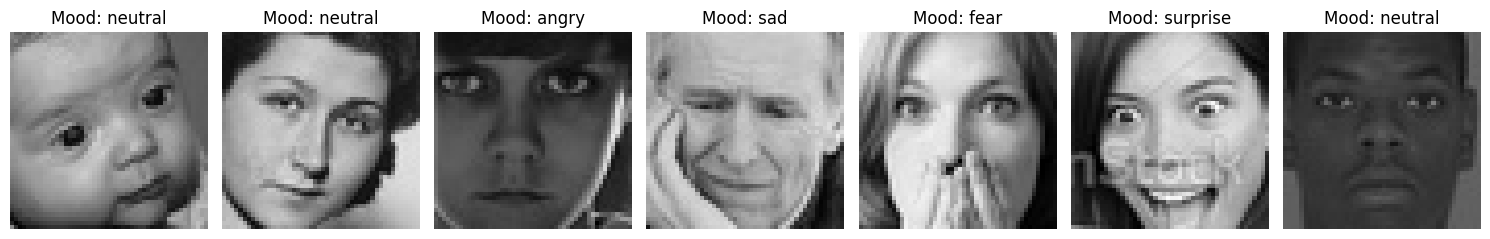

In [19]:
plt.figure(figsize=(15,25))
i_c = 1
for x_path in range(len(df.PATH.values)):
    plt.subplot(1,7,i_c)
    img = cv.cvtColor(cv.imread(df.PATH[x_path*20]),cv.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(f"Mood: {class_names[df.CLASS[x_path*20]]}")
    plt.imshow(img)
    if i_c == 7:
        break
    i_c += 1
plt.tight_layout()
plt.show()

### **Pre Processing**

In [20]:
from tqdm import tqdm
def preprocess(image_list, target_list, data, path_col, target_col):
    for image_path in tqdm(data[path_col].values):
        image = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2GRAY)
        image = image.reshape(image.shape[0], image.shape[1]) / 255.
        target = data[target_col][data[path_col] == image_path].values[0]
        image_list.append(image)
        target_list.append(target)
        
data_image = []
target_image = []
preprocess(data_image,target_image,df,"PATH","CLASS")

  0%|          | 30/28709 [00:00<05:49, 82.10it/s]

100%|██████████| 28709/28709 [03:32<00:00, 135.32it/s]


In [35]:
image_array = np.array(data_image)
target_array = np.array(target_image)

In [36]:
from sklearn.model_selection import train_test_split

# First, split the data into training (70%) and temporary (30%) sets
X_temp, X_test, y_temp, y_test = train_test_split(image_array, target_array, test_size=0.1, random_state=42)

# Then, split the temporary set into validation (15%) and test (15%) sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_val)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 12919
Number of validation samples: 12919
Number of testing samples: 2871


In [37]:
print(f"Shape of Image Data : {X_train.shape}")
print(f"Shape Of Target Column: {y_train.shape}")

Shape of Image Data : (12919, 48, 48)
Shape Of Target Column: (12919,)


In [38]:
print(f"Validation Data Shape: {X_val.shape}")
print(f"Validation Target Shape: {y_val.shape}")

Validation Data Shape: (12919, 48, 48)
Validation Target Shape: (12919,)


In [44]:
val_target = np_utils.to_categorical(y_val)
target_array = np_utils.to_categorical(y_train)

### **Model Traning**

In [45]:
shape = (48,48) #Image Size

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten

model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="same", activation="relu", input_shape=(48,48,1)))
model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(units=84, activation="relu"))
model.add(Dense(units=7, activation="softmax"))
model.compile(optimizer=Adam(),loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#print(model.summary())

In [49]:
import keras.backend as K
K.clear_session()
history = model.fit(X_train,target_array,epochs=30,validation_data=(X_val,val_target),batch_size=120)

Epoch 1/30
108/108 [==============================] - 73s 672ms/step - loss: 1.0803 - accuracy: 0.5967 - val_loss: 1.2755 - val_accuracy: 0.5137
Epoch 2/30
108/108 [==============================] - 67s 625ms/step - loss: 1.0305 - accuracy: 0.6101 - val_loss: 1.3216 - val_accuracy: 0.5000
Epoch 3/30
108/108 [==============================] - 71s 655ms/step - loss: 1.0046 - accuracy: 0.6274 - val_loss: 1.2679 - val_accuracy: 0.5261
Epoch 4/30
108/108 [==============================] - 68s 630ms/step - loss: 0.9787 - accuracy: 0.6363 - val_loss: 1.2719 - val_accuracy: 0.5257
Epoch 5/30
108/108 [==============================] - 68s 629ms/step - loss: 0.9433 - accuracy: 0.6487 - val_loss: 1.3129 - val_accuracy: 0.5082
Epoch 6/30
108/108 [==============================] - 70s 649ms/step - loss: 0.9015 - accuracy: 0.6670 - val_loss: 1.2911 - val_accuracy: 0.5253
Epoch 7/30
108/108 [==============================] - 67s 622ms/step - loss: 0.8789 - accuracy: 0.6663 - val_loss: 1.3386 - val_ac

### **Plotting The Curves**

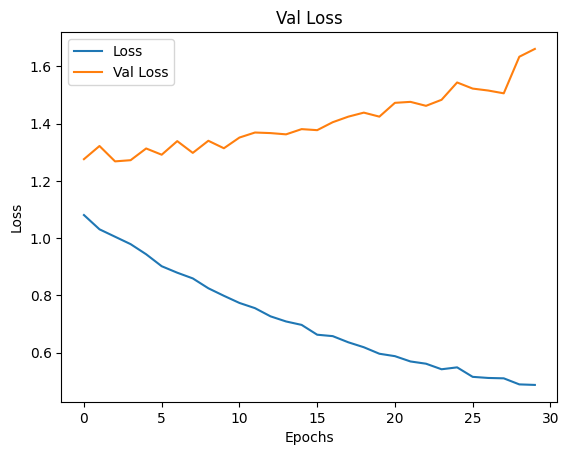

In [50]:

plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Val Loss")
plt.legend()
plt.show()

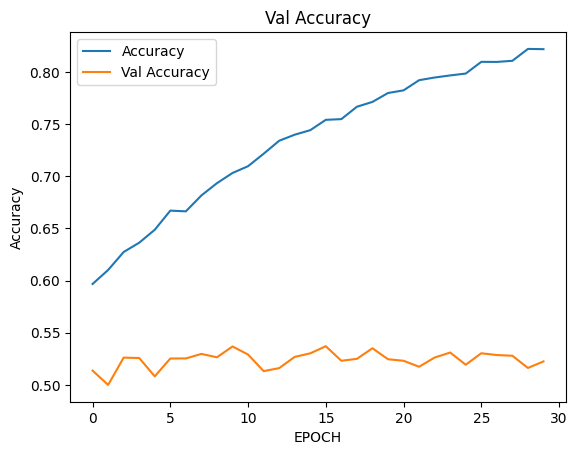

In [51]:

plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.title("Val Accuracy")
plt.legend()
plt.show()

### **Test Images For This Model**

In [52]:
#Making the predictions
predictions = model.predict(X_test)

90/90 [==============================] - 4s 40ms/step


#### Selecting A random index adn predicting for it 

1/1 [==============================] - 0s 45ms/step


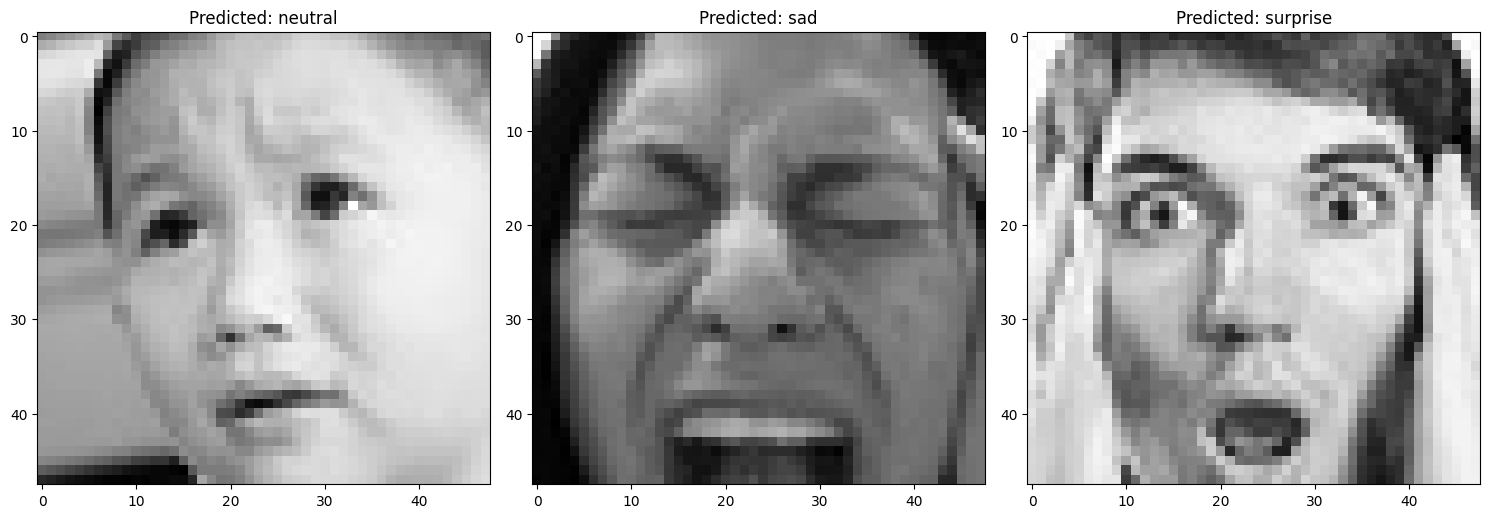

In [54]:
#Plotting the predictions and corresponing mood of the image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    # Select a random index
    random_index = np.random.choice(len(X_test))
    # Make a prediction for the random image
    prediction = model.predict(np.expand_dims(X_test[random_index], axis=0))
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class]

    # Plot the image with the predicted label
    ax.imshow(X_test[random_index], cmap='gray')
    ax.set_title(f"Predicted: {predicted_class_name}")

plt.tight_layout()
plt.show()